In [1234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Load data

In [1235]:
# Load dataset
df = pd.read_csv('./south+german+credit+update/SouthGermanCredit.asc', delimiter=' ')

# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [1236]:
# Get visual info of data set
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [1237]:
# Dealing with missing values
df.isna().sum()

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

Prepare data

In [1238]:

# Split input variables and output variables
X = df.drop(["kredit"], axis=1)
y = df["kredit"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y) 

In [1239]:
# Create Scaler
scale_standard = StandardScaler()

# Feature Scaling
X_train = scale_standard.fit_transform(X_train)
X_test = scale_standard.fit_transform(X_test)

Principal Component Analysis

In [1240]:
# Create Principal Component Analysis
pca = PCA(random_state = 42).fit(X_train)

In [1241]:
# Extract the explained variance across components
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = pca.explained_variance_ratio_.cumsum()

Visualization

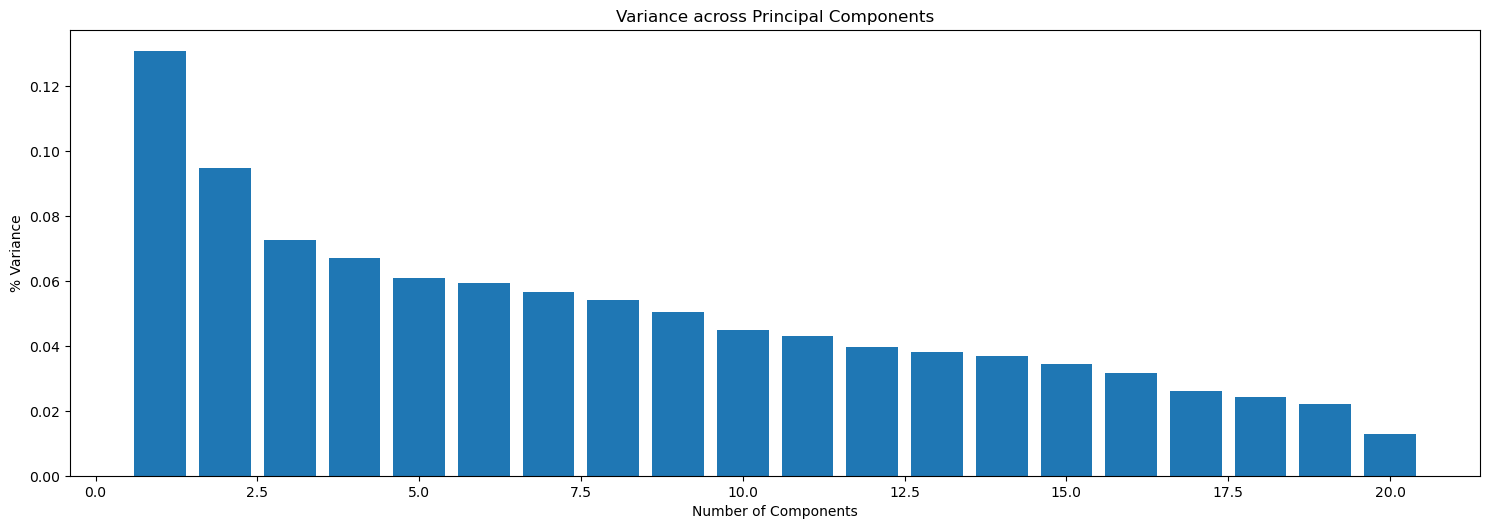

In [1242]:

# Create list for number of components
num_vars_list = list(range(1,21))
plt.figure(figsize =(15,10))

# Plot the variance explained by each component
plt.subplot(2,1,1)
plt.bar(num_vars_list,explained_variance)
plt.title("Variance across Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% Variance")
plt.tight_layout()

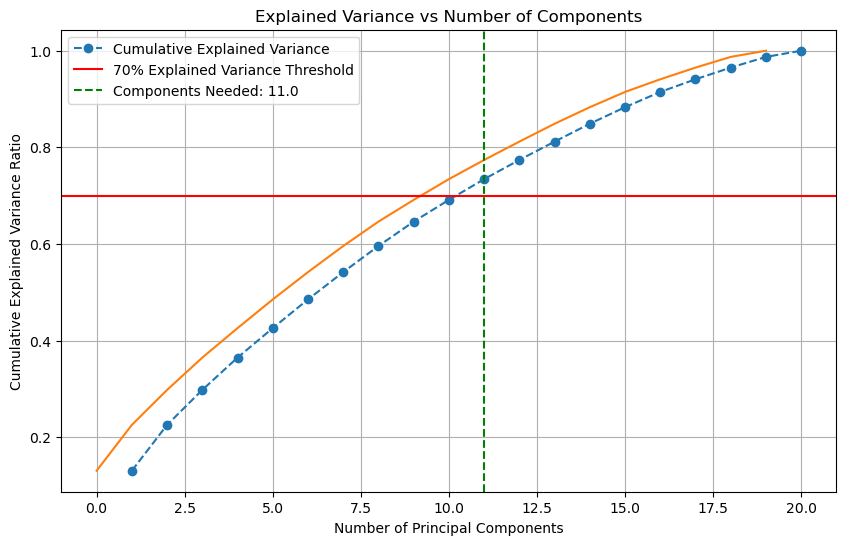

In [1243]:
# Calculate number of components
components_needed = np.argmax(explained_variance_cumulative > 0.7) + 1.0

# Plot of losing info
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='--', label="Cumulative Explained Variance")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.7, color='r', linestyle='-', label="70% Explained Variance Threshold")
plt.axvline(x=components_needed, color='g', linestyle='--', label=f"Components Needed: {components_needed}")

plt.title('Explained Variance vs Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Minimum number of components needed to retain at least 70% information is into range 10 - 11 components. In the plot we have some inaccuracy from the double precision values.

In [1244]:
# Create model with 70% components
pca = PCA(n_components = 0.70, random_state = 42)

# Train again 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("We used PCA number of components: ", pca.n_components_)

We used PCA number of components:  11


In [1245]:
#  Apply PCA with selected number of components
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train, y_train)
RandomForestClassifier(random_state=42)

# Assess model accuracy
y_pred_class = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


Conclusion: PCA is mportant for linear and logistic regression when dataset is big. It helps us to reduce size and increase model performance. We train Random forest classifer model to check how it will be trained and finally will get very good result with just 11 components. Almost half of dataset we didn't use. In result we got 80 accuracy, that is quite good value.